In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
economicData = pd.read_csv('C:\\Users\\Bonoc\\Documents\\Medium\\BRICS\\archive\\BRICS Development Indicators\\Economy_Data.csv', sep=';')


In [3]:
economicData.head(10)

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,Brazil,BRA,1970.0,NaN
1,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,China,CHN,1970.0,NaN
2,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,India,IND,1970.0,NaN
3,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,Russian Federation,RUS,1970.0,NaN
4,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,South Africa,ZAF,1970.0,NaN
5,Adjusted net national income (constant 2010 US$),NY.ADJ.NNTY.KD,Brazil,BRA,1970.0,3.918974e+11
6,Adjusted net national income (constant 2010 US$),NY.ADJ.NNTY.KD,China,CHN,1970.0,NaN
7,Adjusted net national income (constant 2010 US$),NY.ADJ.NNTY.KD,India,IND,1970.0,1.915335e+11
8,Adjusted net national income (constant 2010 US$),NY.ADJ.NNTY.KD,Russian Federation,RUS,1970.0,NaN
9,Adjusted net national income (constant 2010 US$),NY.ADJ.NNTY.KD,South Africa,ZAF,1970.0,NaN


In [4]:
economicData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86500 entries, 0 to 86499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SeriesName   86350 non-null  object 
 1   SeriesCode   86250 non-null  object 
 2   CountryName  86250 non-null  object 
 3   CountryCode  86250 non-null  object 
 4   Year         86500 non-null  float64
 5   Value        60348 non-null  float64
dtypes: float64(2), object(4)
memory usage: 4.0+ MB


In [5]:
economicData.shape

(86500, 6)

In [6]:
economicData.describe()

,Year,Value
count,86500.000000,6.034800e+04
mean,1994.500000,1.567603e+12
std,14.430953,8.948589e+12
min,1970.000000,-7.018725e+12
25%,1982.000000,1.336501e+01
50%,1994.500000,3.354500e+07
75%,2007.000000,8.238063e+10
max,2019.000000,2.083713e+14


In [7]:
economicData.dropna(subset=['Value'], inplace=True)

In [8]:
economicData.columns

Index(['SeriesName', 'SeriesCode', 'CountryName', 'CountryCode', 'Year',
       'Value'],
      dtype='object')

In [9]:
economicData.isna()

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
5,False,False,False,False,False,False
7,False,False,False,False,False,False
10,False,False,False,False,False,False
11,False,False,False,False,False,False
12,False,False,False,False,False,False
...,...,...,...,...,...,...
86490,False,False,False,False,False,False
86491,False,False,False,False,False,False
86492,False,False,False,False,False,False
86493,False,False,False,False,False,False


In [10]:
economicData.dropna(inplace=True)

In [12]:
economicData.shape

(60348, 6)

In [13]:
economicData.reset_index(drop=True, inplace=True)

In [39]:
indicators = set([x for x in economicData['SeriesName']])
indicators

{'Adjusted net national income (annual % growth)',
 'Adjusted net national income (constant 2010 US$)',
 'Adjusted net national income (current US$)',
 'Adjusted net national income per capita (annual % growth)',
 'Adjusted net national income per capita (constant 2010 US$)',
 'Adjusted net national income per capita (current US$)',
 'Adjusted net savings, excluding particulate emission damage (% of GNI)',
 'Adjusted net savings, excluding particulate emission damage (current US$)',
 'Adjusted net savings, including particulate emission damage (% of GNI)',
 'Adjusted net savings, including particulate emission damage (current US$)',
 'Adjusted savings: carbon dioxide damage (% of GNI)',
 'Adjusted savings: carbon dioxide damage (current US$)',
 'Adjusted savings: consumption of fixed capital (% of GNI)',
 'Adjusted savings: consumption of fixed capital (current US$)',
 'Adjusted savings: education expenditure (% of GNI)',
 'Adjusted savings: education expenditure (current US$)',
 'Adju

In [15]:
economicData.drop(['SeriesCode', 'CountryName'], axis=1, inplace=True)

In [40]:
labels = ['Adjusted savings: education expenditure (% of GNI)', 
          'Adjusted net national income (current US$)',
          'GDP (current US$)',
          'GDP growth (annual %)',
          'GDP per capita (current US$)',
          'Exports of goods and services (% of GDP)',
          'GNI (current US$)',
          'Imports of goods and services (current US$)']

In [51]:
economicData = economicData.loc[economicData['SeriesName'].isin(labels)]
economicData

,SeriesName,CountryCode,Year,Value
2,Adjusted net national income (current US$),BRA,1970.0,3.786021e+10
3,Adjusted net national income (current US$),CHN,1970.0,8.525561e+10
4,Adjusted net national income (current US$),IND,1970.0,5.776720e+10
27,Adjusted savings: education expenditure (% of ...,BRA,1970.0,3.599282e+00
28,Adjusted savings: education expenditure (% of ...,CHN,1970.0,1.610277e+00
29,Adjusted savings: education expenditure (% of ...,IND,1970.0,2.466131e+00
30,Adjusted savings: education expenditure (% of ...,RUS,1970.0,3.900000e+00
31,Adjusted savings: education expenditure (% of ...,ZAF,1970.0,5.039765e+00
122,Exports of goods and services (% of GDP),BRA,1970.0,7.029436e+00
123,Exports of goods and services (% of GDP),CHN,1970.0,2.491556e+00


In [53]:
economicData.loc[:,'Year'] = pd.to_datetime(economicData['Year'],format='%Y').dt.year
economicData

,SeriesName,CountryCode,Year,Value
2,Adjusted net national income (current US$),BRA,1970,3.786021e+10
3,Adjusted net national income (current US$),CHN,1970,8.525561e+10
4,Adjusted net national income (current US$),IND,1970,5.776720e+10
27,Adjusted savings: education expenditure (% of ...,BRA,1970,3.599282e+00
28,Adjusted savings: education expenditure (% of ...,CHN,1970,1.610277e+00
29,Adjusted savings: education expenditure (% of ...,IND,1970,2.466131e+00
30,Adjusted savings: education expenditure (% of ...,RUS,1970,3.900000e+00
31,Adjusted savings: education expenditure (% of ...,ZAF,1970,5.039765e+00
122,Exports of goods and services (% of GDP),BRA,1970,7.029436e+00
123,Exports of goods and services (% of GDP),CHN,1970,2.491556e+00


In [54]:
brazil = economicData[economicData['CountryCode'] == 'BRA']
brazil.shape

(398, 4)

In [55]:
china = economicData[economicData['CountryCode'] == 'CHN']
china.head()

,SeriesName,CountryCode,Year,Value
3,Adjusted net national income (current US$),CHN,1970,8.525561e+10
28,Adjusted savings: education expenditure (% of ...,CHN,1970,1.610277e+00
123,Exports of goods and services (% of GDP),CHN,1970,2.491556e+00
216,GDP (current US$),CHN,1970,9.260297e+10
220,GDP growth (annual %),CHN,1970,1.930000e+01


In [56]:
southAfrica = economicData[economicData['CountryCode'] == 'ZAF']
southAfrica.head()

,SeriesName,CountryCode,Year,Value
31,Adjusted savings: education expenditure (% of ...,ZAF,1970,5.039765e+00
125,Exports of goods and services (% of GDP),ZAF,1970,2.119945e+01
218,GDP (current US$),ZAF,1970,1.841839e+10
222,GDP growth (annual %),ZAF,1970,5.248674e+00
238,GDP per capita (current US$),ZAF,1970,8.345528e+02


In [57]:
russia = economicData[economicData['CountryCode'] == 'RUS']
russia.shape

(264, 4)

In [58]:
india = economicData[economicData['CountryCode'] == 'IND']
india.shape

(398, 4)

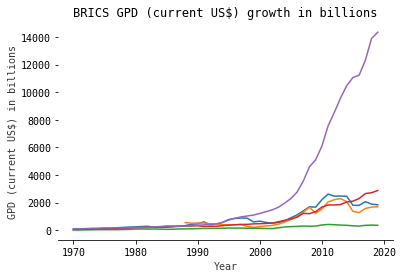

In [97]:
plt.plot(brazil.loc[economicData['SeriesName'].isin(['GDP (current US$)'])]['Year'],
         brazil.loc[economicData['SeriesName'].isin(['GDP (current US$)'])]['Value']/1000000000)

plt.plot(russia.loc[economicData['SeriesName'].isin(['GDP (current US$)'])]['Year'],
         russia.loc[economicData['SeriesName'].isin(['GDP (current US$)'])]['Value']/1000000000)

plt.plot(southAfrica.loc[economicData['SeriesName'].isin(['GDP (current US$)'])]['Year'],
         southAfrica.loc[economicData['SeriesName'].isin(['GDP (current US$)'])]['Value']/1000000000)

plt.plot(india.loc[economicData['SeriesName'].isin(['GDP (current US$)'])]['Year'],
         india.loc[economicData['SeriesName'].isin(['GDP (current US$)'])]['Value']/1000000000)

plt.plot(china.loc[economicData['SeriesName'].isin(['GDP (current US$)'])]['Year'],
         china.loc[economicData['SeriesName'].isin(['GDP (current US$)'])]['Value']/1000000000)


plt.title('BRICS GPD (current US$) growth in billions')
plt.xlabel('Year')
plt.ylabel('GPD (current US$) in billions')

plt.show()